In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
# load the dataset
data=pd.read_csv(r"C:\Users\Khushi\Desktop\house_price.csv")
data

,ID,MSZONING,LOTAREA,STREET,NEIGHBORHOOD,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,FENCE,SALEPRICE
0,1,RL,9600,Paved,CollgCr,2005,2005,1500,3,2,1,500,0,Good,250000
1,2,RL,11000,Gravel,Edwards,1999,2000,1700,4,3,2,600,0,Good,350000
2,3,RL,7200,Paved,NAmes,1990,1990,1300,3,2,1,400,0,Excellent,200000
3,4,RM,8600,Paved,Sawyer,2002,2003,1600,3,2,1,450,0,Good,280000
4,5,RL,11200,Paved,OldTown,2004,2005,1800,4,3,1,700,0,Good,380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,RL,10800,Paved,OldTown,2004,2005,1900,4,3,2,650,0,Good,380000
96,97,RL,11800,Paved,CollgCr,2000,2001,1600,3,2,1,450,0,Good,270000
97,98,RL,9500,Paved,Edwards,2009,2010,1700,3,2,1,500,0,Good,290000
98,99,RL,10600,Paved,NAmes,2012,2013,2300,5,4,3,750,0,Excellent,520000


In [18]:
# Display summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            100 non-null    int64 
 1   MSZONING      100 non-null    object
 2   LOTAREA       100 non-null    int64 
 3   STREET        100 non-null    object
 4   NEIGHBORHOOD  100 non-null    object
 5   YEARBUILT     100 non-null    int64 
 6   YEARREMOD     100 non-null    int64 
 7   GRLIVAREA     100 non-null    int64 
 8   BEDROOMS      100 non-null    int64 
 9   BATHROOMS     100 non-null    int64 
 10  FIREPLACES    100 non-null    int64 
 11  GARAGEAREA    100 non-null    int64 
 12  POOLS         100 non-null    int64 
 13  FENCE         100 non-null    object
 14  SALEPRICE     100 non-null    int64 
dtypes: int64(11), object(4)
memory usage: 11.8+ KB


In [20]:
data.describe()

,ID,LOTAREA,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,SALEPRICE
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.0,100.000000
mean,50.500000,10586.000000,2001.590000,2002.390000,1763.50000,3.590000,2.590000,1.62000,568.000000,0.0,327250.000000
std,29.011492,1042.047324,5.490294,5.323656,252.84792,0.712018,0.712018,0.72167,134.374721,0.0,90969.455968
min,1.000000,7200.000000,1985.000000,1986.000000,1200.00000,2.000000,1.000000,0.00000,300.000000,0.0,180000.000000
25%,25.750000,9775.000000,1998.000000,1999.000000,1600.00000,3.000000,2.000000,1.00000,450.000000,0.0,250000.000000
50%,50.500000,10600.000000,2001.000000,2002.000000,1750.00000,3.500000,2.500000,2.00000,550.000000,0.0,305000.000000
75%,75.250000,11325.000000,2005.250000,2006.000000,1900.00000,4.000000,3.000000,2.00000,650.000000,0.0,390000.000000
max,100.000000,13000.000000,2012.000000,2013.000000,2300.00000,5.000000,4.000000,3.00000,850.000000,0.0,520000.000000


In [22]:
# display the no of rows and no of columns
data.shape

(100, 15)

In [24]:
# display the first 3 rows of the dataset
data.head(3)

,ID,MSZONING,LOTAREA,STREET,NEIGHBORHOOD,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,FENCE,SALEPRICE
0,1,RL,9600,Paved,CollgCr,2005,2005,1500,3,2,1,500,0,Good,250000
1,2,RL,11000,Gravel,Edwards,1999,2000,1700,4,3,2,600,0,Good,350000
2,3,RL,7200,Paved,NAmes,1990,1990,1300,3,2,1,400,0,Excellent,200000


In [26]:
# display the last 3 rows of the dataset
data.tail(3)

,ID,MSZONING,LOTAREA,STREET,NEIGHBORHOOD,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,FENCE,SALEPRICE
97,98,RL,9500,Paved,Edwards,2009,2010,1700,3,2,1,500,0,Good,290000
98,99,RL,10600,Paved,NAmes,2012,2013,2300,5,4,3,750,0,Excellent,520000
99,100,RL,12000,Paved,Sawyer,1998,1999,2000,4,3,2,700,0,Good,380000


In [28]:
# display the random row
data.sample()

,ID,MSZONING,LOTAREA,STREET,NEIGHBORHOOD,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,FENCE,SALEPRICE
14,15,RM,11800,Gravel,NAmes,2000,2001,1800,4,3,2,600,0,Good,330000


In [30]:
# displays the datatype of the columns
data.dtypes

ID               int64
MSZONING        object
LOTAREA          int64
STREET          object
NEIGHBORHOOD    object
YEARBUILT        int64
YEARREMOD        int64
GRLIVAREA        int64
BEDROOMS         int64
BATHROOMS        int64
FIREPLACES       int64
GARAGEAREA       int64
POOLS            int64
FENCE           object
SALEPRICE        int64
dtype: object

In [33]:
# display the missing values from the dataset
data.isna()

,ID,MSZONING,LOTAREA,STREET,NEIGHBORHOOD,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,FENCE,SALEPRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
# display the mean of "LOTAREA"
mean=data["LOTAREA"].mean()
mean

10586.0

In [37]:
# display the mean of "SALEPRICE"
mean=data["SALEPRICE"].mean()
mean

327250.0

In [39]:
# drop rows where "SALEPRICE" is missing
data=data.dropna(subset=["SALEPRICE"])
data

,ID,MSZONING,LOTAREA,STREET,NEIGHBORHOOD,YEARBUILT,YEARREMOD,GRLIVAREA,BEDROOMS,BATHROOMS,FIREPLACES,GARAGEAREA,POOLS,FENCE,SALEPRICE
0,1,RL,9600,Paved,CollgCr,2005,2005,1500,3,2,1,500,0,Good,250000
1,2,RL,11000,Gravel,Edwards,1999,2000,1700,4,3,2,600,0,Good,350000
2,3,RL,7200,Paved,NAmes,1990,1990,1300,3,2,1,400,0,Excellent,200000
3,4,RM,8600,Paved,Sawyer,2002,2003,1600,3,2,1,450,0,Good,280000
4,5,RL,11200,Paved,OldTown,2004,2005,1800,4,3,1,700,0,Good,380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,RL,10800,Paved,OldTown,2004,2005,1900,4,3,2,650,0,Good,380000
96,97,RL,11800,Paved,CollgCr,2000,2001,1600,3,2,1,450,0,Good,270000
97,98,RL,9500,Paved,Edwards,2009,2010,1700,3,2,1,500,0,Good,290000
98,99,RL,10600,Paved,NAmes,2012,2013,2300,5,4,3,750,0,Excellent,520000


In [41]:
# apply onehot encoding on "NEIGHBORHOOD" column

ohe=OneHotEncoder()
x=ohe.fit_transform(data[["NEIGHBORHOOD"]]).toarray()
print(x)
data1=pd.DataFrame(x,columns=["CollgCr","Edwards","NAmes","Sawyer","OldTown"])	
data1
datacn=pd.concat([data,data1],axis=1)
print(datacn)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0.

In [43]:
# apply label encoding on SALEPRICE column
le=LabelEncoder()
data["New Ht"]=le.fit_transform(data["SALEPRICE"])
print(data)

     ID MSZONING  LOTAREA  STREET NEIGHBORHOOD  YEARBUILT  YEARREMOD  \
0     1       RL     9600   Paved      CollgCr       2005       2005   
1     2       RL    11000  Gravel      Edwards       1999       2000   
2     3       RL     7200   Paved        NAmes       1990       1990   
3     4       RM     8600   Paved       Sawyer       2002       2003   
4     5       RL    11200   Paved      OldTown       2004       2005   
..  ...      ...      ...     ...          ...        ...        ...   
95   96       RL    10800   Paved      OldTown       2004       2005   
96   97       RL    11800   Paved      CollgCr       2000       2001   
97   98       RL     9500   Paved      Edwards       2009       2010   
98   99       RL    10600   Paved        NAmes       2012       2013   
99  100       RL    12000   Paved       Sawyer       1998       1999   

    GRLIVAREA  BEDROOMS  BATHROOMS  FIREPLACES  GARAGEAREA  POOLS      FENCE  \
0        1500         3          2           1         

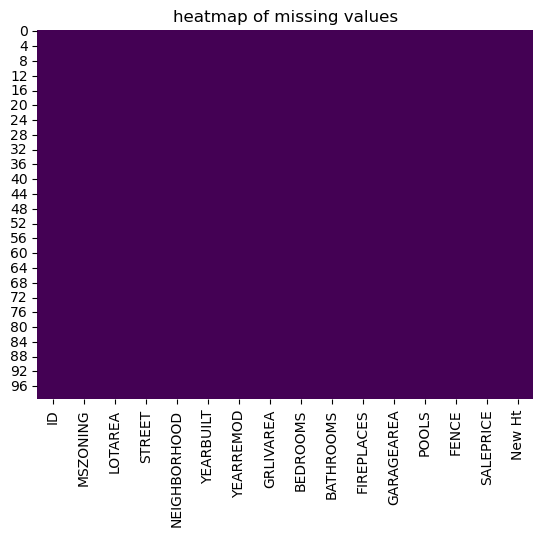

In [55]:
# Heatmap of missing values
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.title('heatmap of missing values')
plt.show()

In [57]:
# Fill missing values for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0])

In [59]:
# Fill missing values for numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    data[column].fillna(data[column].mean())

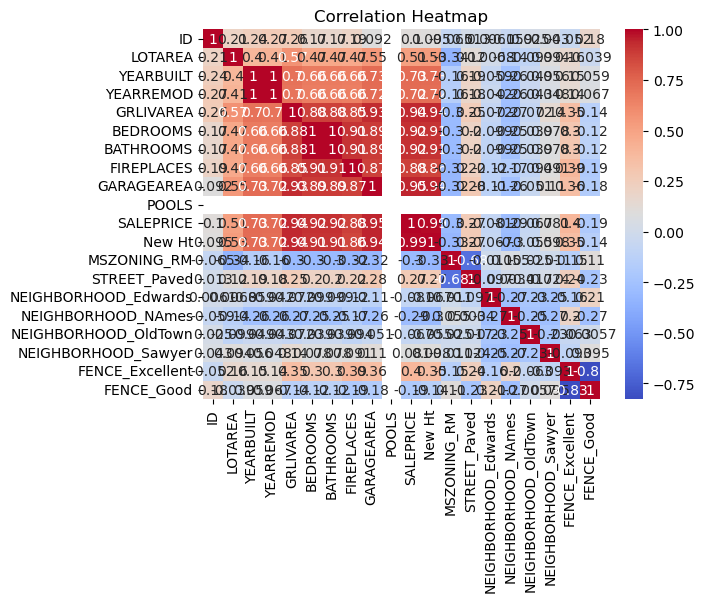

In [61]:
# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Correlation heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

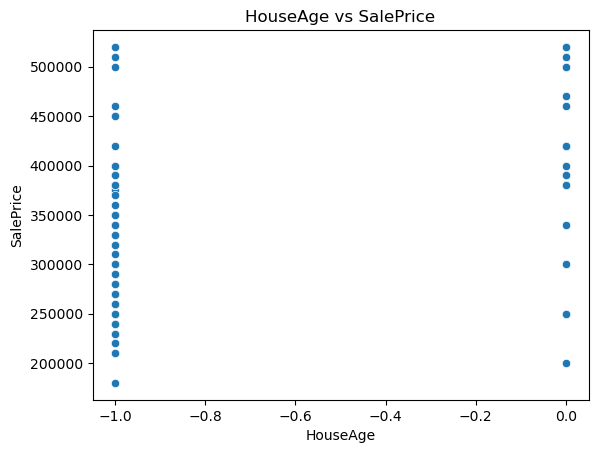

In [62]:
# Create a new feature for house age
data_encoded['HouseAge'] = data_encoded['YEARBUILT'] - data_encoded['YEARREMOD']

# Scatter plot for HouseAge vs SalePrice
sns.scatterplot(x=data_encoded['HouseAge'], y=data_encoded['SALEPRICE'])
plt.title('HouseAge vs SalePrice')
plt.xlabel('HouseAge')
plt.ylabel('SalePrice')
plt.show()

In [63]:
#Model Selection
from sklearn.model_selection import train_test_split

X = data_encoded.drop('SALEPRICE', axis=1)
y = data_encoded['SALEPRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#Training Models:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Train Random Forest model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Train Gradient Boosting model
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [67]:
#Model Evaluation
#Evaluating Model Performance:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
y_pred_lr = model_lr.predict(X_test)
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression - R-squared:", r2_score(y_test, y_pred_lr))

# Evaluate Random Forest
y_pred_rf = model_rf.predict(X_test)
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R-squared:", r2_score(y_test, y_pred_rf))

# Evaluate Gradient Boosting
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting - MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting - R-squared:", r2_score(y_test, y_pred_gb))

Linear Regression - MAE: 7630.236372733862
Linear Regression - MSE: 112644183.99810128
Linear Regression - R-squared: 0.988574481793478
Random Forest - MAE: 2370.0
Random Forest - MSE: 16627000.0
Random Forest - R-squared: 0.9983135206410386
Gradient Boosting - MAE: 737.6546084549409
Gradient Boosting - MSE: 3910209.013827353
Gradient Boosting - R-squared: 0.999603386853248


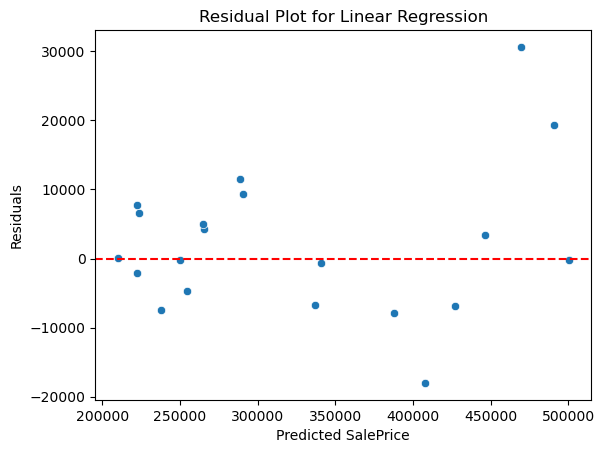

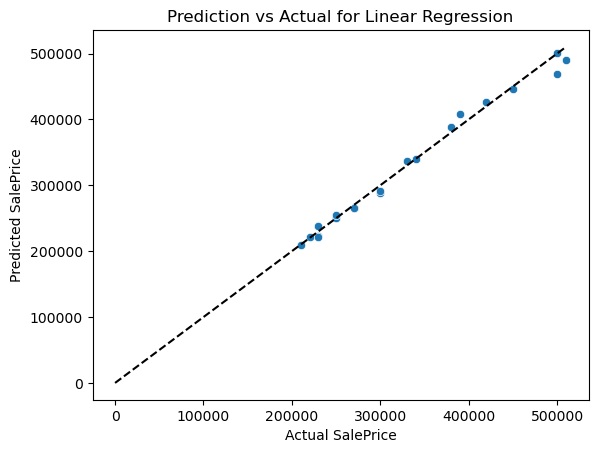

In [69]:
#Residual Plots and Prediction vs Actual Plots:
# Residual plot for Linear Regression
residuals_lr = y_test - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

# Prediction vs Actual plot for Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([0, max(y_test)], [0, max(y_test)], '--k')
plt.title('Prediction vs Actual for Linear Regression')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

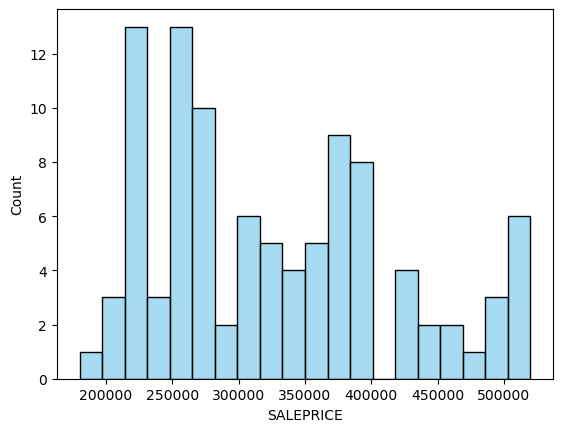

In [75]:
# histogram of the saleprice
sns.histplot(data['SALEPRICE'], bins=20, color='skyblue', edgecolor='black')
plt.show()


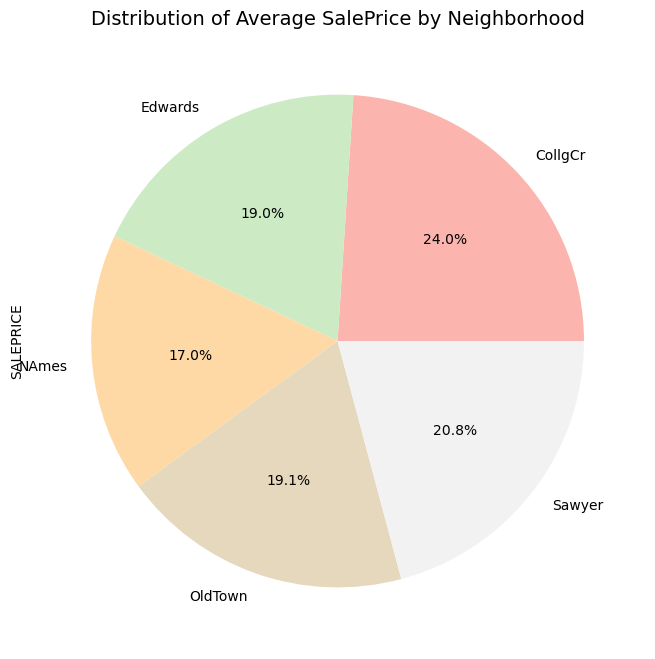

In [77]:
# displays the pie chart of distribution of average saleprice by neighborhood
saleprice_by_neighborhood = data.groupby('NEIGHBORHOOD')['SALEPRICE'].mean()

plt.figure(figsize=(8, 8))
saleprice_by_neighborhood.plot(kind='pie', autopct='%1.1f%%', cmap='Pastel1', legend=False)

plt.title('Distribution of Average SalePrice by Neighborhood', fontsize=14)
plt.show()

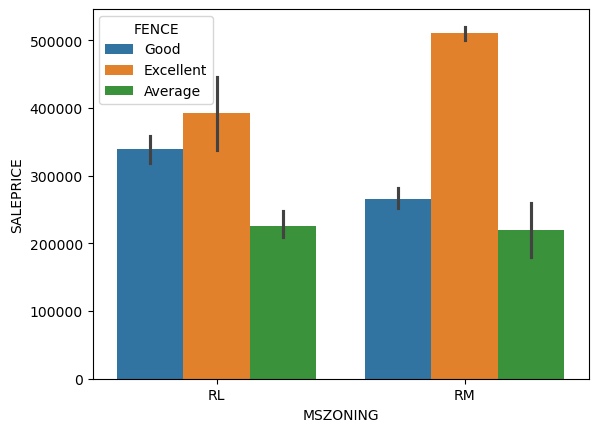

In [79]:
# displays the bar plot 
sns.barplot(x='MSZONING', y='SALEPRICE', data=data, estimator='mean', hue='FENCE')
plt.show()

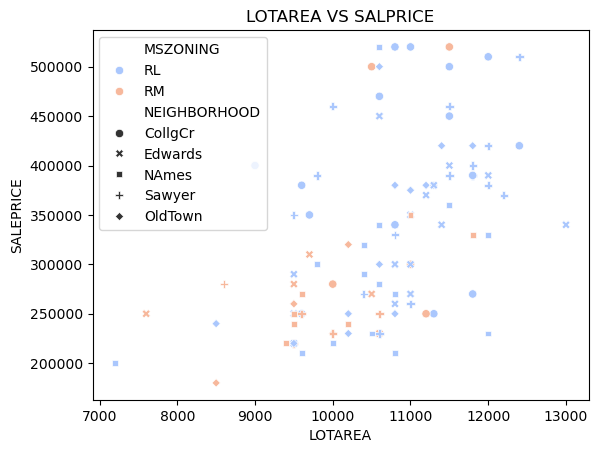

In [81]:
# display the scatterplot in lotarea vs saleprice
sns.scatterplot(x='LOTAREA', y='SALEPRICE',data=data, hue='MSZONING', style='NEIGHBORHOOD',palette='coolwarm')
plt.title('LOTAREA VS SALPRICE')
plt.xlabel('LOTAREA')
plt.ylabel('SALEPRICE')
plt.show()

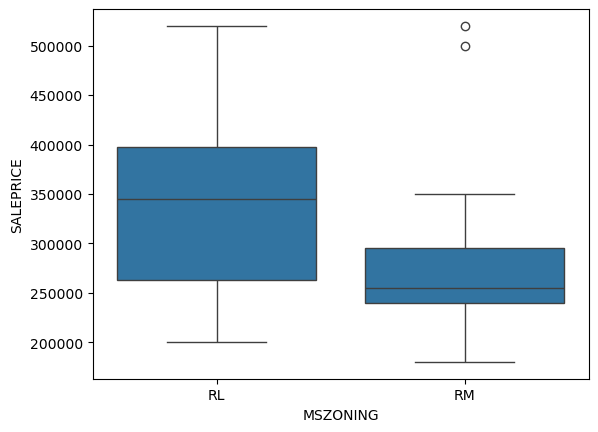

In [83]:
# displays the boxplot
sns.boxplot(x='MSZONING', y='SALEPRICE', data=data)
plt.show()